In [1]:
#Common imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import cvxpy as cp
from numpy import linalg
import scs
import _scs_gpu

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# df1 = df.copy()
# df1["dummy"] = 1

# df1 = df1[['dummy', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
#          'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [5]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


<AxesSubplot:>

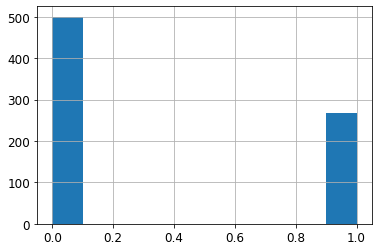

In [6]:
df.Outcome.hist()

In [7]:
X = df.drop("Outcome", axis = 1)
Y = df["Outcome"].to_numpy()
Y = np.where(Y == 0, -1, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_scaled = mmscaler.fit_transform(X)


In [9]:
X_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [12]:
type(Y)

numpy.ndarray

In [56]:
from sklearn.datasets import make_classification


df_ToY = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
Y_TOY = df_ToY.iloc[0:100, 4].values
Y_TOY = np.where(Y_TOY == 'Iris-setosa', -1, 1)

# sepal length and petal length
X_TOY = df_ToY.iloc[0:100, [0,2]].values



print(len(X_TOY))
print(len(Y_TOY))


#plt.scatter(X_TOY[0:,0],X_TOY[0:,1])

#X_TOY

100
100


array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

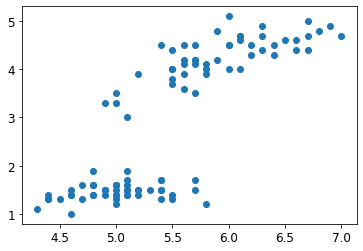

In [68]:
plt.scatter(X_TOY[0:,0],X_TOY[0:,1])

In [15]:
from sklearn.datasets import make_moons, make_circles, make_classification
X_class, y_class = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
y_class = np.where(y_class == 0, -1, 1)


X_circles, y_circles = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=1)

y_circles = np.where(y_circles == 0, -1, 1)



X_moons, y_moons = make_moons(n_samples=100, noise=0.3, random_state=0)

y_moons = np.where(y_moons == 0, -1, 1)

In [39]:
n_samples = len(X_circles)
n = X_circles.shape[1]
d = X_circles.shape[0]

alpha = cp.Variable(shape=(d),pos=True)
C = cp.Parameter()
C.value = 13000
    
H = np.dot((y_circles[:,None] * X_circles) , (  y_circles[:,None] * X_circles).T)

   

obj = cp.Minimize(- cp.sum(alpha)+(1/2)*cp.quad_form(alpha,H))

constraint_1 = [alpha >= 0]
constaint_2 = [alpha <= C/n]
constraint_3 = [(y_circles@alpha) == 0]

constraint = constraint_1 + constaint_2 + constraint_3

prob = cp.Problem(obj, constraint)

results = prob.solve()
#print (prob.status)
#print(alpha.value)
    
   
aaa = alpha.value
aaa = np.where(aaa>1e-5 , aaa, 0)
w_dual = ((y_circles.T * aaa.T) @ X_circles)
aaa = np.where(aaa>(13000/n)-0.1 , 0, aaa)
S = (aaa > 0).flatten()
b = y_circles[S] - np.dot(X_circles[S], w_dual)
    
weight_w_bias = np.concatenate(([b[0]],w_dual))

In [40]:
# w =  [[ 1.53167533  5.99583022 -1.00913952 -0.73006476 -0.21293898  4.85424676
#    2.56394536  0.52695855]]
# b =  [-6.76750171]

shaa=alpha.value

weight_w_bias

array([ 0.29023384,  0.75884662, -0.65151097])

In [41]:
b

array([0.29023384, 0.29023384, 0.29023384])

In [13]:
class Perceptron:
    
    def __init__ (self, niter, LR):
        
        self.niter = niter 
        self.LR = LR 
        
        
    def fit (self, x, y ):
        self.m = []
        accuracy = {}
        max_accuracy = 0
        
        self.weight = np.ones(1 + x.shape[1])
        
        for i in range(self.niter):
            m_count = 0
            for x_row , y_row in zip(x,y):
                loss = self.LR * (y_row - self.activation_out(x_row))
                self.weight[1:] += self.LR * x_row.dot(loss)
                self.weight[0] += self.LR * loss
                m_count += int(y_row *(self.activation_out(x_row)) >= 1.0)
            self.m.append(m_count)
            
            accuracy[i] = accuracy_score(self.predict(x), y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.weight[1:]
                chkptb = self.weight[0]
                
        self.weight[1:] = chkptw
        self.weight[0] = chkptb
                
            
        return self
                
                
                
                
    def activation_out(self, x):
        
        #percep = np.dot(self.weight[1:], x) + self.weight[0]
#         np.where(np.dot(self.weight[1:], x) + self.weight[0] >= 0.0 , 1, -1)
        
        return np.dot(self.weight[1:], x) + self.weight[0]
    
    def predict(self, x): 
        
        y = []
        
        for x1 in x:
            
            results = np.where(self.activation_out(x1) >= 0.0 , 1, -1)
            y.append(results)
            
        return np.array(y)
    
    def show_weights (self):
        
        print ("W = ", self.weight[1:])
        
        print("\n")
        
        print("bias = ", self.weight[0])
        
    

In [14]:
x_train.shape[1]

NameError: name 'x_train' is not defined

In [1356]:


# def svm_train_primal (data_train, label_train, regularisation_para_C):
#     n_samples = len(data_train)
#     d = data_train.shape[1]
#     n = data_train.shape[0]

#     W = cp.Variable((d))
#     bias = cp.Variable()
#     epi = cp.Variable(n)
#     C = cp.Parameter()
#     C.value = regularisation_para_C

#     obj = cp.Minimize((1/2 * cp.norm(W) + 1/n_samples*C*cp.sum(epi) ))


#     constranit_1 = [cp.multiply(label_train,(data_train@W+bias)) >= (1-epi)]

#     constraint_2 = [epi >= 0]

#     constraints = constranit_1 + constraint_2

#     prob = cp.Problem(obj, constraints)

#     prob.solve()

#     #print (prob.status)

#     w = W.value
#     b = bias.value
    
#     weight_w_bias = np.concatenate(([b],w))
    
#     return weight_w_bias
    

# def svm_predict_primal(data_test , label_test , svm_model):
    
    
#     predicted = []
        
#     for x1 in data_test:
            
#             results = np.where((np.dot(svm_model[1:], x1) + svm_model[0]) >= 0.0 , 1, -1)
#             predicted.append(results)
    
    
#     return accuracy_score(label_test, predicted)
    

In [767]:
# def svm_train_dual (data_train , label_train , regularisation_para_C):
#     n_samples = len(data_train)
#     n = data_train.shape[1]
#     d = data_train.shape[0]

#     alpha = cp.Variable(shape=(d,1),pos=True)
#     C = cp.Parameter()
#     C.value = regularisation_para_C
    
#     H = np.dot((label_train[:,None] * data_train) , (  label_train[:,None] * data_train).T)

   

#     obj = cp.Minimize(- cp.sum(alpha)+(1/2)*cp.quad_form(alpha,H))

#     constraint_1 = [alpha >= 0]
#     constaint_2 = [alpha <= C]
#     constraint_3 = [(label_train@alpha) == 0]

#     constraint = constraint_1 + constaint_2 + constraint_3

#     prob = cp.Problem(obj, constraint)

#     results = prob.solve()
#     #print (prob.status)
#     #print(alpha.value)
    
    
#     aaa = alpha.value
#     aaa = np.where(aaa>1e-5 , aaa, 0)
#     w_dual = ((label_train.T * aaa.T) @ data_train)
#     aaa = np.where(aaa>130-0.1 , 0, aaa)
#     S = (aaa > 0).flatten()
#     b = label_train[S] - np.dot(data_train[S], w_dual[0])
    
#     weight_w_bias = np.concatenate(([b[0]],w_dual[0]))
    
#     return weight_w_bias
    

    

    
    
# def svm_predict_dual(data_test , label_test , svm_model):
    
#     predicted = []
        
#     for x1 in data_test:
            
#             results = np.where((np.dot(svm_model[1:], x1) + svm_model[0]) >= 0.0 , 1, -1)
#             predicted.append(results)
    
    
#     return accuracy_score(label_test, predicted)
    
    
    

In [1357]:
# svm_model = svm_train_primal( x_train , y_train , 130)

# test_accuracy = svm_predict_primal(x_test , y_test , svm_model)

# print(test_accuracy)



# svm_model_d   = svm_train_dual(  x_train , y_train , 130)

# test_accuracy_d = svm_predict_dual( x_test , y_test , svm_model_d)


# print(test_accuracy_d)

0.7272727272727273


In [43]:
class SVM:


    def __init__ (self, regularisation_para_C, kernel = linear_kernel ):
        
        self.regularisation_para_C = regularisation_para_C 
        self.kernel = kernel


    def fit (self, data_train, label_train):
        n_samples = len(data_train)
        n = data_train.shape[1]
        d = data_train.shape[0]

        alpha = cp.Variable((d))
        C = cp.Parameter()
        C.value = self.regularisation_para_C
        
        K = np.zeros((n_samples, n_samples))
        
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(data_train[i], data_train[j])
        
        
        H = np.outer(label_train[:,None],label_train[:,None]) * K      
       
       # H = np.dot((label_train[:,None] * data_train) , (  label_train[:,None] * data_train).T)

        obj = cp.Minimize(- cp.sum(alpha)+(1/2)*cp.quad_form(alpha,H))

        constraint_1 = [alpha >= 0]
        constaint_2 = [alpha <= C]
        constraint_3 = [(label_train@alpha) == 0]

        constraint = constraint_1 + constaint_2 + constraint_3

        prob = cp.Problem(obj, constraint)

        results = prob.solve(solver= cp.SCS , verbose=True )
#         results = prob.solve(solver=cp.SCS , gpu=True 
#                              , use_indirect=True ,acceleration_lookback =10,verbose=True)

        #print (prob.status)
        #print(alpha.value)


#         aaa = alpha.value
#         aaa = np.where(aaa>1e-5 , aaa, 0)
#         w_dual = ((label_train.T * aaa.T) @ data_train)  
#         aaa = np.where(aaa>self.regularisation_para_C-0.1 , 0, aaa)
#         S = (aaa > 0).flatten()
#         b = label_train[S] - np.dot(data_train[S], w_dual[0])

#         self.weight_w_bias = np.concatenate(([b[0]],w_dual[0]))
        aa = alpha.value
        aa1 = aa.reshape(n_samples)
        sv = aa1 > 1e-8
        self.ind = (np.arange(len(aa1))[sv])
        self.aa1 = aa1[sv]
        self.sv_x = data_train[sv]
        self.sv_y = label_train[sv]

#         print(len(self.sv_y))
#         print(self.sv_y)
        
        
        self.bias = 0
        for n in range(self.aa1.shape[0]):
            self.bias += self.sv_y[n]
            self.bias -= np.sum(self.aa1*self.sv_y * K[self.ind[n],sv])

        self.bias /= self.aa1.shape[0]
        
        
        
        if self.kernel== linear_kernel :
            self.w = np.zeros(8)
            for n in range(len(self.aa1)):
                self.w += (self.aa1[n] * self.sv_y[n] * self.sv_x[n])
                
        return self

            
            
    def predict(self, X):
        predicted = []
        
        if self.kernel == linear_kernel:
            
            for xi in X:
                results = np.where((np.dot(xi, self.w) + self.bias) >= 0.0 , 1, -1)
                predicted.append(results)
                
        elif self.kernel != linear_kernel:
            
            for i in range(len(X)):
                y_predict = 0 
                for b, a , c in zip(self.sv_x, self.aa1, self.sv_y):
                    y_predict += a * c * self.kernel(X[i], b)
                y_predict = y_predict+ self.bias
                predicted.append(np.sign(y_predict))
                    
        return predicted

            





#     def predict(self, x):

#         predicted = []

#         for x1 in x:

#                 results = np.where((np.dot(self.weight_w_bias[1:], x1) + self.weight_w_bias[0]) >= 0.0 , 1, -1)
#                 predicted.append(results)


#         return predicted
    
    def show_weights (self):
        
        print ("W = ", self.w)
        
        print("\n")
        
        print("bias = ", self.bias)
        
#         return self.w

    
    

In [44]:
clf = SVM(10000, gaussian_kernel)

clf.fit(x_train, y_train)

predicted_svm = clf.predict(x_test)

print('Accuracy score: ', accuracy_score(y_test, predicted_svm))
print('Metrics Report')
print(classification_report(y_test, predicted_svm))



----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 7370
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 615, constraints m = 1240
Cones:	primal zero / dual free vars: 1
	linear vars: 1228
	soc vars: 11, soc blks: 1
Setup time: 6.56e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.15e+20  3.71e+20  9.99e-01 -3.17e+26 -9.05e+22  7.50e+26  5.55e-03 
   100| 3.07e-02  1.04e-01  1.01e-02 -3.35e+06 -3.41e+06  1.93e-10  1.39e-02 
   200| 5.63e-03  3.44e-03  1.30e-03 -3.26e+06 -3.27e+06  2.18e

In [10]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Perceptron
#pred = Perceptron(200, 0.01)
# use cross_validation
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=100)
#pred.fit(x_train, y_train)



614

In [574]:
predicted = pred.predict(x_test)

In [616]:
pred.show_weights()

W =  [ 0.60506629  0.37155302 -0.18704989  0.42939749  0.75720934  0.27768506
  0.74849375  0.69239037]


bias =  -1.0522529857020821


In [72]:
from mlxtend.plotting import plot_decision_regions


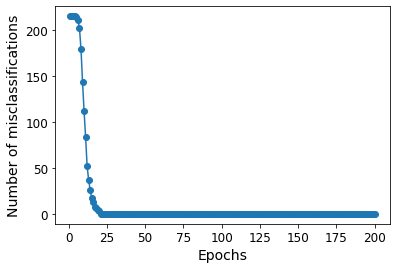

In [584]:
plt.plot(range(1, len(pred.m) + 1), pred.m, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [585]:

print('Accuracy score: ', accuracy_score(y_test, predicted))
print('Metrics Report')
print(classification_report(y_test, predicted))

Accuracy score:  0.6883116883116883
Metrics Report
              precision    recall  f1-score   support

          -1       0.74      0.80      0.77       101
           1       0.56      0.47      0.51        53

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



In [1350]:
pred_Toy = Perceptron(100, 0.01)

predicted_TOY = pred_Toy.fit(X_TOY,Y_TOY)

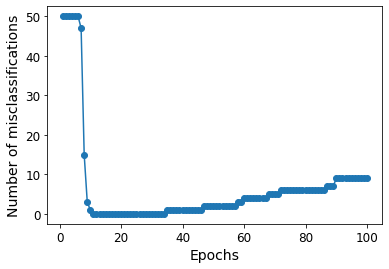

In [609]:
plt.plot(range(1, len(pred_Toy.m) + 1), pred_Toy.m, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

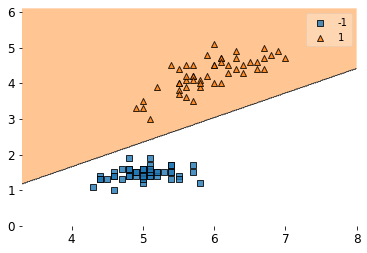

In [1351]:
plot_decision_regions(X_TOY, Y_TOY, clf=predicted_TOY)

In [155]:
len(x_train)

614

In [637]:
import cvxpy as cp


n_samples = len(x_train)
d = x_train.shape[1]
n = x_train.shape[0]

W = cp.Variable((d))
bias = cp.Variable()
epi = cp.Variable(n)
C = cp.Parameter()
C.value = 130

obj = cp.Minimize((1/2 * cp.norm(W) + 1/n_samples*C*cp.sum(epi) ))


constranit_1 = [cp.multiply(y_train,(x_train@W+bias)) >= (1-epi)]

constraint_2 = [epi >= 0]

constraints = constranit_1 + constraint_2

prob = cp.Problem(obj, constraints)

prob.solve()

print (prob.status)

w = W.value
b = bias.value

abs_weight = np.concatenate(([b],w))

optimal


In [638]:
w

# w =  [[ 1.53167533  5.99583022 -1.00913952 -0.73006476 -0.21293898  4.85424676
#    2.56394536  0.52695855]]

array([ 1.32504218,  5.43300321, -0.66773043, -0.59734178, -0.07754136,
        4.02410562,  2.18675555,  0.73984986])

In [635]:
b

array(-6.16357439)

In [639]:
abs_weight[1:]

array([ 1.32504218,  5.43300321, -0.66773043, -0.59734178, -0.07754136,
        4.02410562,  2.18675555,  0.73984986])

In [75]:
    
def predict_array_svm(x, w, b): 
    
    y = []
        
    for x1 in x:
        results = np.where(np.dot(w, x1) + b >= 0.0 , 1, -1)
        y.append(results)
            
    return np.array(y)
        

In [1352]:
np.logspace(1, 3 , 30)

array([  10.        ,   11.72102298,   13.73823796,   16.10262028,
         18.87391822,   22.12216291,   25.92943797,   30.39195382,
         35.6224789 ,   41.75318937,   48.93900918,   57.3615251 ,
         67.23357536,   78.80462816,   92.36708572,  108.26367339,
        126.89610032,  148.73521073,  174.33288222,  204.33597179,
        239.502662  ,  280.72162039,  329.03445623,  385.66204212,
        452.03536564,  529.83169063,  621.01694189,  727.8953844 ,
        853.16785242, 1000.        ])

In [1353]:
np.linspace(400, 1000, 30)

array([ 400.        ,  420.68965517,  441.37931034,  462.06896552,
        482.75862069,  503.44827586,  524.13793103,  544.82758621,
        565.51724138,  586.20689655,  606.89655172,  627.5862069 ,
        648.27586207,  668.96551724,  689.65517241,  710.34482759,
        731.03448276,  751.72413793,  772.4137931 ,  793.10344828,
        813.79310345,  834.48275862,  855.17241379,  875.86206897,
        896.55172414,  917.24137931,  937.93103448,  958.62068966,
        979.31034483, 1000.        ])

In [212]:


y = []
        
for x1 in x_test:
    results = np.where(np.dot(w[1:], x1) + w[0] >= 0.0 , 1, -1)
    y.append(results)






#predicted_svm = predict_array_svm(x_test ,w, b)

print('Accuracy score: ', accuracy_score(y_test, y))
print('Metrics Report')
print(classification_report(y_test, y))

Accuracy score:  0.7272727272727273
Metrics Report
              precision    recall  f1-score   support

          -1       0.76      0.85      0.80       101
           1       0.63      0.49      0.55        53

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



In [33]:
def linear_kernel(x1, x2):
    return np.dot(x1.T, x2)

def polynomial_kernel(x, y, p=4):
    return (1 + np.dot(x.T, y)) ** p

def gaussian_kernel(x, y, sigma=100):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

In [1209]:
len(x_test)

154

In [1306]:
ones = np.ones((614,1))
x_train_one = np.hstack((ones,x_train))
ones_test = np.ones((154,1))
x_test_one = np.hstack((ones_test,x_test))
n_samples = len(x_train)
n = x_train.shape[1]
d = x_train.shape[0]

alpha = cp.Variable(d)
# #bias = cp.Variable()
# epi = cp.Variable(d(n))
C = cp.Parameter()
C.value = 130


K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i,j] = polynomial_kernel(x_train[i], x_train[j])
        
        
H = np.outer(y_train,y_train) * K      

# H = np.dot((y_train[:,None] * x_train) , (y_train[:,None] * x_train).T)

# K = y_train[:,None]*x_train
# K = np.dot(K,K.T)


obj = cp.Minimize(- cp.sum(alpha)+(1/2)*cp.quad_form(alpha,H))

constraint_1 = [alpha >= 0]
constaint_2 = [alpha <= C]
constraint_3 = [(y_train@alpha) == 0]

constraint = constraint_1 + constaint_2 + constraint_3

prob = cp.Problem(obj, constraint)

results = prob.solve()
print (prob.status)
print(alpha.value)


optimal
[ 1.30000000e+02  4.18854407e+01  1.30000000e+02  1.30000000e+02
  8.54642302e+01  2.73091296e-13 -9.69622186e-15 -2.39184981e-14
  1.30000000e+02  4.81394753e-14  1.30000000e+02  9.67479539e-14
  6.90626876e-15 -5.92206877e-13 -4.51118590e-13 -3.02709259e-14
  5.18739193e-13  8.53519952e-14  1.30000000e+02 -4.83015969e-13
 -5.15728748e-14 -1.73687152e-13  2.79316843e+01 -1.42411498e-13
  1.49167192e-13 -2.08149079e-13  1.30000000e+02  6.40954450e+01
  9.52848589e+01 -6.59308158e-15  1.30000000e+02  2.52157992e-14
  7.80346256e-14  1.30000000e+02  2.89859406e+00  1.30000000e+02
  8.24296934e-14  1.53025960e-13  9.22859186e+00  1.30000000e+02
  2.63353296e-13 -2.00289478e-14 -2.07294475e-13  1.30000000e+02
  1.30000000e+02  2.13399742e+01  4.45083197e+00 -1.44837362e-14
  1.30000000e+02  7.84122131e+01 -2.61459103e-14 -1.85144063e-14
  8.95304565e-13  9.49662627e+01 -3.59632504e-13 -1.69015445e-13
 -1.07160290e-13  1.30000000e+02  9.34382971e+01  1.30000000e+02
  1.30000000e+02 

In [1307]:
aa = alpha.value
aa1 = np.ravel(aa)
sv = aa1 > 1e-8
ind = (np.arange(len(aa1))[sv])
aa1 = aa1[sv]
sv_x = x_train[sv]
sv_y = y_train[sv]

w = np.zeros(8)
for n in range(len(aa1)):
    w += (aa1[n] * sv_y[n] * sv_x[n])

f = 0
for n in range(aa1.shape[0]):
    f += sv_y[n]
    f -= np.sum(aa1*sv_y * K[ind[n],sv])
                
f /= aa1.shape[0]


#print (aa1)

predicted_k_svm = []
for i in range(len(x_test)):
    y_predict = 0 
    for b, a , c in zip(sv_x, aa1, sv_y):
        y_predict += a * c * polynomial_kernel(x_test[i], b)
    y_predict = y_predict+f
    predicted_k_svm.append(np.sign(y_predict))


In [1309]:
print(sv_y)

[-1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1
 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1
 -1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1
 -1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1
  1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1
 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
  1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1
  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1
  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1  1
 -1 -1  1  1 -1]


In [1308]:
print(classification_report(y_test, predicted_k_svm))

              precision    recall  f1-score   support

          -1       0.75      0.78      0.77       101
           1       0.55      0.51      0.53        53

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



In [1254]:
aa1.shape

(308,)

In [1269]:
w

#print(classification_report(y_test, predicted_k_svm))

array([ 1.52996889,  5.99719254, -1.01078652, -0.72905247, -0.21439858,
        4.85616575,  2.55864741,  0.52924043])

In [1271]:
f

-6.596396653934021

In [935]:
sv_x.astype(int32)

NameError: name 'int32' is not defined

In [901]:
aa1

34.43678331926742

In [888]:
# w =  [[ 1.53167533  5.99583022 -1.00913952 -0.73006476 -0.21293898  4.85424676
#    2.56394536  0.52695855]]
w

array([ 1.52996889,  5.99719254, -1.01078652, -0.72905247, -0.21439858,
        4.85616575,  2.55864741,  0.52924043])

In [842]:
ind

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [853]:
aa1 = aa.reshape(614)
aa1.shape

(614,)

In [703]:
K.shape

(614, 614)

In [729]:
alpha[611].value

array([17.9822436])

In [731]:
aaa = alpha.value
aaa = np.where(aaa>1e-5 , aaa, 0)
#aaa = np.where(aaa>98 , 0, aaa)


print(aaa)

[[130.        ]
 [130.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [130.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [130.        ]
 [  0.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [130.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [130.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [130.        ]
 [  0.        ]
 [130.        ]
 [  0.        ]
 [130.        ]
 [130.        ]
 [130.        ]
 [130.        ]
 [  0.        ]
 [130.  

In [432]:
ann = []
for i in aaa:
    if i != 0:
        ans = i
        ann.append(ans)
len(ann)

308

In [713]:
print(aaa * y_train)

[[-130.        -130.        -130.        ... -130.        -130.
  -130.       ]
 [-130.        -130.        -130.        ... -130.        -130.
  -130.       ]
 [  -0.          -0.          -0.        ...   -0.          -0.
    -0.       ]
 ...
 [ -17.9822436  -17.9822436  -17.9822436 ...  -17.9822436  -17.9822436
   -17.9822436]
 [  -0.          -0.          -0.        ...   -0.          -0.
    -0.       ]
 [  -0.          -0.          -0.        ...   -0.          -0.
    -0.       ]]


In [732]:
w_dual = ((y_train.T * aaa.T) @ x_train)

In [733]:
print(w_dual[0])

[ 1.52996889  5.99719254 -1.01078652 -0.72905247 -0.21439858  4.85616575
  2.55864741  0.52924043]


In [716]:
x_train[1]

array([0.23529412, 0.73366834, 0.69672131, 0.27272727, 0.11820331,
       0.43070045, 0.04739539, 0.1       ])

In [726]:
#bias_dual = y_train[2] *(w_dual[0].T @ x_train[2].T)

aaa = np.where(aaa>130-0.1 , 0, aaa)

S = (aaa > 0).flatten()
b = y_train[S] - np.dot(x_train[S], w_dual[0])

In [727]:
b

array([-6.76812827, -6.76812827, -6.76812827, -6.76812827, -6.76812827,
       -6.76812827, -6.76812827, -6.76812827, -6.76812827])

In [734]:
weight_w_bias = np.concatenate(([b[0]],w_dual[0]))

In [735]:
weight_w_bias

array([-6.76812827,  1.52996889,  5.99719254, -1.01078652, -0.72905247,
       -0.21439858,  4.85616575,  2.55864741,  0.52924043])

In [240]:
K.shape

(614, 614)

In [1224]:
from sklearn.svm import SVC

X_t = df.drop("Outcome", axis = 1)
Y_t = df["Outcome"].to_numpy()
Y_t = np.where(Y_t == 0, -1, 1)

X_scaled_t = mmscaler.fit_transform(X_t)

x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_scaled_t, Y_t, test_size=0.2, random_state=100)



clf = SVC(C = 130, kernel = 'linear')
clf.fit(x_train_t, y_train_t) 
predicted_svm_sk = clf.predict(x_test_t)
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))
print(classification_report(y_test_t, predicted_svm_sk))


w =  [[ 1.53167533  5.99583022 -1.00913952 -0.73006476 -0.21293898  4.85424676
   2.56394536  0.52695855]]
b =  [-6.76750171]
Indices of support vectors =  [  0   1  16  21  22  26  27  28  33  39  44  48  50  51  53  55  58  62
  75  78  85  91  94  96 102 104 106 111 113 114 122 123 128 132 135 139
 154 157 158 159 161 163 175 176 188 191 194 195 210 213 214 219 220 223
 224 233 234 238 246 248 265 272 274 275 278 282 283 284 294 295 305 309
 313 314 315 319 324 330 332 335 337 339 347 348 350 360 362 363 368 374
 375 379 383 392 395 400 411 413 414 416 419 423 427 435 443 448 449 452
 454 455 461 466 472 473 477 480 481 483 486 492 493 494 496 499 505 507
 508 510 512 532 534 537 540 541 545 546 547 549 550 559 561 567 569 576
 577 582 588 592 593 597 600 603 609 611   3   4   8  17  18  20  30  34
  35  43  57  59  60  63  67  74  79  80  82  83  87  88  93  97 107 108
 115 117 124 125 129 131 140 144 147 151 152 160 170 172 174 177 178 181
 183 184 185 190 205 207 216 218 221 227 